In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 📂 Laad de opgeslagen data
mu = np.load("/home/jupyter-ayoub/results/ForecastPlots/mu.npy")         # shape: (batch_size, time, grid)
targets = np.load("/home/jupyter-ayoub/results/ForecastPlots/targets.npy")
# post_mu = np.load("results/ForecastPlots/post_mu.npy")  # als je deze hebt

In [ ]:
# 🧠 Kies 1 gridpunt (bijv. 500) en batch (bijv. 0)
batch_idx = 0
grid_idx = 0

In [ ]:
mu_series = mu[batch_idx, :, grid_idx]
target_series = targets[batch_idx, :, grid_idx]
# post_series = post_mu[batch_idx, :, grid_idx]       # als je postprocessing gebruikt

In [ ]:
# 🖼️ Plot
plt.figure(figsize=(12, 6))
plt.plot(mu_series, label="Forecasted Radiation (mu)", linestyle="--")
plt.plot(target_series, label="Observed Radiation (target)", linestyle="-")
# plt.plot(post_series, label="Postprocessed Radiation", linestyle="-.")  # indien beschikbaar
plt.xlabel("Timestep (6-hour steps)")
plt.ylabel("Radiation (J/m²)")
plt.title("Radiation Forecast vs Observation (gridpoint {})".format(grid_idx))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mu = np.load("results/ForecastPlots/mu.npy")
targets = np.load("results/ForecastPlots/targets.npy")

batch_idx = 0  # neem eerste batch

# Gemiddelde over alle gridpunten
mu_series = mu[batch_idx].mean(axis=-1)
target_series = targets[batch_idx].mean(axis=-1)

plt.figure(figsize=(12, 6))
plt.plot(mu_series, label="Forecasted Radiation (mu)", linestyle="--")
plt.plot(target_series, label="Observed Radiation", linestyle="-")
plt.xlabel("Timestep (6-hour steps)")
plt.ylabel("Radiation (J/m²)")
plt.title("Mean Radiation Forecast vs Observation (batch {})".format(batch_idx))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Laad voorspellingen en observaties
mu = np.load("results/ForecastPlots/mu.npy")         # (batch, time, grid)
targets = np.load("results/ForecastPlots/targets.npy")

# Neem één dag (batch), bijv. batch 0
batch_idx = 0
mu_day = mu[batch_idx]         # (time, grid)
targets_day = targets[batch_idx]  # (time, grid)

# Gemiddelde straling over alle gridpunten per tijdstap
mu_mean_per_timestep = mu_day.mean(axis=-1)
target_mean_per_timestep = targets_day.mean(axis=-1)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(mu_mean_per_timestep, label="⚡ Forecasted Radiation", linestyle='--', linewidth=2, marker='o')
plt.plot(target_mean_per_timestep, label="🌍 Observed Radiation", linestyle='-', linewidth=2, marker='x')

# Verschil visueel extra duiden (bv. als shaded area)
plt.fill_between(
    np.arange(len(mu_mean_per_timestep)),
    mu_mean_per_timestep,
    target_mean_per_timestep,
    color="gray", alpha=0.2, label="Verschil"
)

plt.title("📅 Straling per Tijdstap - Forecast vs Observatie (1 dag)", fontsize=16)
plt.xlabel("Tijdstap (6-uur)", fontsize=13)
plt.ylabel("Straling (J/m²)", fontsize=13)
plt.xticks(ticks=np.arange(len(mu_mean_per_timestep)))
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Laad voorspellingen en observaties
mu = np.load("results/ForecastPlots/mu.npy")         # (batch, time, grid)
targets = np.load("results/ForecastPlots/targets.npy")

# Neem één dag (batch), bijv. batch 0
batch_idx = 0
mu_day = mu[batch_idx]         # (time, grid)
targets_day = targets[batch_idx]  # (time, grid)

# Gemiddelde straling over alle gridpunten per tijdstap (en squeeze naar 1D)
mu_mean_per_timestep = mu_day.mean(axis=-1).squeeze()
target_mean_per_timestep = targets_day.mean(axis=-1).squeeze()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(mu_mean_per_timestep, label="⚡ Forecasted Radiation", linestyle='--', linewidth=2, marker='o')
plt.plot(target_mean_per_timestep, label="🌍 Observed Radiation", linestyle='-', linewidth=2, marker='x')

# Visuele aanduiding van verschil
plt.fill_between(
    np.arange(len(mu_mean_per_timestep)),
    mu_mean_per_timestep,
    target_mean_per_timestep,
    color="gray", alpha=0.2, label="Verschil"
)

plt.title("📅 Straling per Tijdstap - Forecast vs Observatie (1 dag)", fontsize=16)
plt.xlabel("Tijdstap (6-uur)", fontsize=13)
plt.ylabel("Straling (J/m²)", fontsize=13)
plt.xticks(ticks=np.arange(len(mu_mean_per_timestep)))
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Laad voorspellingen en observaties
mu = np.load("results/ForecastPlots/mu.npy")         # (batch, time, grid)
targets = np.load("results/ForecastPlots/targets.npy")

# Neem één dag (batch), bijv. batch 0
batch_idx = 0
mu_day = mu[batch_idx]         # (time, grid)
targets_day = targets[batch_idx]  # (time, grid)

# Gemiddelde straling over alle gridpunten per tijdstap en plat maken naar 1D
mu_mean_per_timestep = mu_day.mean(axis=-1).flatten()
target_mean_per_timestep = targets_day.mean(axis=-1).flatten()
timesteps = np.arange(mu_mean_per_timestep.shape[0])

# Plot
plt.figure(figsize=(14, 6))
plt.plot(timesteps, mu_mean_per_timestep, label="⚡ Forecasted Radiation", linestyle='--', linewidth=2, marker='o')
plt.plot(timesteps, target_mean_per_timestep, label="🌍 Observed Radiation", linestyle='-', linewidth=2, marker='x')

# Verschil visueel aanduiden
plt.fill_between(
    timesteps,
    mu_mean_per_timestep,
    target_mean_per_timestep,
    color="gray", alpha=0.2, label="Verschil"
)

plt.title("📅 Straling per Tijdstap - Forecast vs Observatie (1 dag)", fontsize=16)
plt.xlabel("Tijdstap (6-uur)", fontsize=13)
plt.ylabel("Straling (J/m²)", fontsize=13)
plt.xticks(ticks=timesteps)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Laad voorspellingen en observaties
mu = np.load("results/ForecastPlots/mu.npy")         # shape: (batch, time, grid)
targets = np.load("results/ForecastPlots/targets.npy")

# Kies één dag (batch 0)
batch_idx = 0
mu_day = mu[batch_idx]         # shape: (time, grid)
targets_day = targets[batch_idx]

# Gemiddelde over gridpunten
mu_mean_per_timestep = mu_day.mean(axis=-1).flatten()
target_mean_per_timestep = targets_day.mean(axis=-1).flatten()

# Dynamisch correcte tijdstappen maken
timesteps = np.arange(len(mu_mean_per_timestep))

# Plot
plt.figure(figsize=(14, 6))
plt.plot(timesteps, mu_mean_per_timestep, label="⚡ Forecasted Radiation", linestyle='--', linewidth=2, marker='o')
plt.plot(timesteps, target_mean_per_timestep, label="🌍 Observed Radiation", linestyle='-', linewidth=2, marker='x')

plt.fill_between(
    timesteps,
    mu_mean_per_timestep,
    target_mean_per_timestep,
    color="gray", alpha=0.2, label="Verschil"
)

plt.title("🌞 Gemiddelde Straling per Tijdstap – Forecast vs Observatie", fontsize=16)
plt.xlabel("Tijdstap (6-uur)", fontsize=13)
plt.ylabel("Straling (J/m²)", fontsize=13)
plt.xticks(ticks=timesteps)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Laad bestanden vanuit jouw lokale pad
mu = np.load("/home/jupyter-ayoub/results/ForecastPlots/mu.npy")         # (batch, ensemble, time, grid)
targets = np.load("/home/jupyter-ayoub/results/ForecastPlots/targets.npy")  # (batch, 1, time, grid)

# Batch 0 selecteren
mu_day = mu[0]        # (ensemble, time, grid)
targets_day = targets[0]  # (1, time, grid)

# Bereken gemiddeld over ensemble en grid
mu_avg = mu_day.mean(axis=0).mean(axis=-1)         # (time,)
targets_avg = targets_day.squeeze(0).mean(axis=-1) # (time,)

# Tijdstappen
timesteps = np.arange(len(mu_avg))

# Plot
plt.figure(figsize=(14, 6))
plt.plot(timesteps, mu_avg, label="⚡ Forecasted Radiation", linestyle='--', linewidth=2, marker='o')
plt.plot(timesteps, targets_avg, label="🌍 Observed Radiation", linestyle='-', linewidth=2, marker='x')
plt.fill_between(timesteps, mu_avg, targets_avg, color="gray", alpha=0.2, label="Verschil")

plt.title("🌤️ Gemiddelde Straling per Tijdstap – Forecast vs Observatie (1 dag)", fontsize=16)
plt.xlabel("Tijdstap (6-uur interval)", fontsize=13)
plt.ylabel("Gemiddelde Straling (J/m²)", fontsize=13)
plt.xticks(ticks=timesteps)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mu = np.load("results/ForecastPlots/mu.npy")
targets = np.load("results/ForecastPlots/targets.npy")
raw = np.load("results/ForecastPlots/raw_forecast.npy")  # 👈 extra regel

mu_day = mu[0]        # (ensemble, time, grid)
targets_day = targets[0]  # (1, time, grid)

mu_avg = mu_day.mean(axis=0).mean(axis=-1)
targets_avg = targets_day.squeeze(0).mean(axis=-1)
raw_avg = raw  # shape: (time,) al

timesteps = np.arange(len(mu_avg))

plt.figure(figsize=(14, 6))
plt.plot(timesteps, mu_avg, label="⚡ ML Forecast", linestyle='--', linewidth=2, marker='o')
plt.plot(timesteps, raw_avg, label="📡 Original EUPP Forecast", linestyle=':', linewidth=2, marker='s')
plt.plot(timesteps, targets_avg, label="🌍 Observed Radiation", linestyle='-', linewidth=2, marker='x')
plt.fill_between(timesteps, mu_avg, targets_avg, color="gray", alpha=0.15, label="ML vs Obs verschil")

plt.title("Vergelijking: EUPP Forecast vs ML vs Observatie", fontsize=16)
plt.xlabel("Tijdstap (6-uur)", fontsize=13)
plt.ylabel("Gemiddelde Straling (J/m²)", fontsize=13)
plt.xticks(ticks=timesteps)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pad naar je .npy bestanden
mu = np.load("/home/jupyter-ayoub/results/ForecastPlots/mu.npy")              # shape: (batch, tijd, grid)
targets = np.load("/home/jupyter-ayoub/results/ForecastPlots/targets.npy")    # shape: (batch, tijd, grid)
raw_forecast = np.load("/home/jupyter-ayoub/results/ForecastPlots/raw_forecast.npy")  # shape: (tijd,) = 20

# Kies batch/dag
batch_idx = 0

# Bereken het gemiddelde over gridpunten voor deze dag
mu_day = mu[batch_idx].mean(axis=-1)             # shape: (20,)
targets_day = targets[batch_idx].mean(axis=-1)   # shape: (20,)
raw_day = raw_forecast                           # al shape: (20,)

# Tijd-as
timesteps = np.arange(len(mu_day))

# Maak de plot
plt.figure(figsize=(14, 6))
plt.plot(timesteps, mu_day, label="📡 ML Forecast", linestyle='--', marker='o', linewidth=2)
plt.plot(timesteps, raw_day, label="📊 Original EUPP Forecast", linestyle=':', marker='s', linewidth=2)
plt.plot(timesteps, targets_day, label="🌍 Observed Radiation", linestyle='-', marker='x', linewidth=2)

# Toon verschil als grijze schaduw
plt.fill_between(timesteps, mu_day, targets_day, alpha=0.2, color='gray', label="ML vs Obs verschil")

# Titels en labels
plt.title("🌤️ Vergelijking: ML vs EUPP vs Observatie (gemiddeld over grid)", fontsize=16)
plt.xlabel("Tijdstap (6-uur)", fontsize=13)
plt.ylabel("Gemiddelde Straling (J/m²)", fontsize=13)
plt.xticks(timesteps)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Laad je data
mu = np.load("/home/jupyter-ayoub/results/ForecastPlots/mu.npy")              # shape: (batch, tijd, grid)
targets = np.load("/home/jupyter-ayoub/results/ForecastPlots/targets.npy")    # shape: (batch, tijd, grid)
raw_forecast = np.load("/home/jupyter-ayoub/results/ForecastPlots/raw_forecast.npy")  # shape: (tijd,) = 20

# Neem batch 0
mu_day = mu[0].mean(axis=-1)         # (tijd, grid) → (20,)
targets_day = targets[0, 0].mean(axis=-1)  # (tijd, grid) → (20,)
raw_mean = raw_forecast              # (20,)

timesteps = np.arange(20)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(timesteps, mu_day, label="📡 ML Forecast", linestyle='--', marker='o')
plt.plot(timesteps, raw_mean, label="📊 Original EUPP Forecast", linestyle=':', marker='s')
plt.plot(timesteps, targets_day, label="🌍 Observed Radiation", linestyle='-', marker='x')

plt.fill_between(timesteps, mu_day, targets_day, alpha=0.2, color='gray', label="ML vs Obs verschil")

plt.title("Vergelijking: Forecasts vs Observaties (gemiddelde over grid)", fontsize=16)
plt.xlabel("Tijdstap (6-uur)", fontsize=13)
plt.ylabel("Gemiddelde Straling (J/m²)", fontsize=13)
plt.xticks(timesteps)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 📂 Laad de opgeslagen arrays
mu = np.load("/home/jupyter-ayoub/results/ForecastPlots/mu.npy")              # Shape: (batch, tijd, grid)
targets = np.load("/home/jupyter-ayoub/results/ForecastPlots/targets.npy")    # Shape: (batch, 1, tijd, grid)
raw_forecast = np.load("/home/jupyter-ayoub/results/ForecastPlots/raw_forecast.npy")  # Shape: (tijd,)

# 🛠 Functie om alles te plotten voor een gekozen batch
def plot_straling(batch_idx=0):
    """
    Plot de gemiddelde straling per tijdstap voor ML-voorspelling, EUPP forecast en observaties.
    """

    # ⏱ Tijdstappen
    timesteps = np.arange(20)

    # 📡 ML Forecast (gemiddelde over grid)
    mu_day = mu[batch_idx].mean(axis=-1)  # (tijd, grid) → (tijd,)

    # 🌍 Observaties (gemiddelde over grid)
    targets_day = targets[batch_idx, 0].mean(axis=-1)

    # 📊 Originele EUPP Forecast (is al shape (20,))
    raw_mean = raw_forecast

    # 📈 Plot
    plt.figure(figsize=(14, 6))
    plt.plot(timesteps, mu_day, label="📡 ML Forecast", linestyle='--', marker='o', linewidth=2)
    plt.plot(timesteps, raw_mean, label="📊 Original EUPP Forecast", linestyle=':', marker='s', linewidth=2)
    plt.plot(timesteps, targets_day, label="🌍 Observed Radiation", linestyle='-', marker='x', linewidth=2)

    # 🌫 Grijze zone tussen ML en observatie
    plt.fill_between(
        timesteps,
        mu_day,
        targets_day,
        color="gray", alpha=0.2, label="ML vs Obs verschil"
    )

    plt.title(f"Vergelijking: EUPP Forecast vs ML vs Observatie (Batch {batch_idx})", fontsize=16)
    plt.xlabel("Tijdstap (6-uur)", fontsize=13)
    plt.ylabel("Gemiddelde Straling (J/m²)", fontsize=13)
    plt.xticks(timesteps)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# 👇 Roep de functie aan voor een dag (batch)
plot_straling(batch_idx=0)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 📂 Laad data
mu = np.load("/home/jupyter-ayoub/results/ForecastPlots/mu.npy")              # (batch, tijd, grid)
targets = np.load("/home/jupyter-ayoub/results/ForecastPlots/targets.npy")    # (batch, tijd, grid)
raw_forecast = np.load("/home/jupyter-ayoub/results/ForecastPlots/raw_forecast.npy")  # (batch, tijd, grid)

# 🧼 Print shapes (optioneel)
print("mu shape:", mu.shape)
print("targets shape:", targets.shape)
print("raw_forecast shape:", raw_forecast.shape)

# 🛠 Functie om te plotten
def plot_straling(batch_idx=0):
    timesteps = np.arange(mu.shape[1])  # normaal 20
    mu_mean = mu[batch_idx].mean(axis=-1)
    targets_mean = targets[batch_idx].mean(axis=-1)
    raw_mean = raw_forecast[batch_idx].mean(axis=-1)

    plt.figure(figsize=(14, 6))
    plt.plot(timesteps, mu_mean, label="📡 ML Forecast", linestyle='--', marker='o')
    plt.plot(timesteps, raw_mean, label="📊 Original EUPP Forecast", linestyle=':', marker='s')
    plt.plot(timesteps, targets_mean, label="🌍 Observed Radiation", linestyle='-', marker='x')

    # Shaded verschil
    plt.fill_between(timesteps, mu_mean, targets_mean, color='gray', alpha=0.2, label="ML vs Obs verschil")

    plt.title(f"Vergelijking: EUPP Forecast vs ML vs Observatie (Batch {batch_idx})", fontsize=15)
    plt.xlabel("Tijdstap (6-uur)", fontsize=13)
    plt.ylabel("Gemiddelde Straling (J/m²)", fontsize=13)
    plt.xticks(timesteps)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# 🔁 Roep de functie aan voor batch 0
plot_straling(batch_idx=0)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 📂 Laad data
mu = np.load("/home/jupyter-ayoub/results/ForecastPlots/mu.npy")              # (4, 4, 20, 1056)
targets = np.load("/home/jupyter-ayoub/results/ForecastPlots/targets.npy")    # (4, 1, 20, 1056)
raw_forecast = np.load("/home/jupyter-ayoub/results/ForecastPlots/raw_forecast.npy")  # (20,)

def plot_straling(batch_idx=0):
    # ⏱ Tijdstappen
    timesteps = np.arange(mu.shape[2])  # 20 tijdstappen

    # 🎯 Gemiddelde per tijdstap (over grid)
    mu_mean = mu[batch_idx].mean(axis=(0, -1))          # over ensemble & grid → (20,)
    targets_mean = targets[batch_idx].mean(axis=(-1))   # over grid → (20,)
    raw_mean = raw_forecast                             # al (20,)

    # 📊 Plot
    plt.figure(figsize=(14, 6))
    plt.plot(timesteps, mu_mean, label="📡 ML Forecast", linestyle='--', marker='o')
    plt.plot(timesteps, raw_mean, label="📊 Original EUPP Forecast", linestyle=':', marker='s')
    plt.plot(timesteps, targets_mean, label="🌍 Observed Radiation", linestyle='-', marker='x')

    # 🎨 Verschil visueel
    plt.fill_between(timesteps, mu_mean, targets_mean, color='gray', alpha=0.2, label="ML vs Obs verschil")

    # 🧾 Layout
    plt.title(f"Vergelijking: EUPP Forecast vs ML vs Observatie (Batch {batch_idx})", fontsize=15)
    plt.xlabel("Tijdstap (6-uur)", fontsize=13)
    plt.ylabel("Gemiddelde Straling (J/m²)", fontsize=13)
    plt.xticks(timesteps)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# 🖼️ Plot voor één dag
plot_straling(batch_idx=0)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 📂 Laad data
mu = np.load("/home/jupyter-ayoub/results/ForecastPlots/mu.npy")              # (4, 4, 20, 1056)
targets = np.load("/home/jupyter-ayoub/results/ForecastPlots/targets.npy")    # (4, 1, 20, 1056)
raw_forecast = np.load("/home/jupyter-ayoub/results/ForecastPlots/raw_forecast.npy")  # (20,)

def plot_straling(batch_idx=0):
    timesteps = np.arange(mu.shape[2])  # 20 tijdstappen

    mu_mean = mu[batch_idx].mean(axis=(0, -1))              # (20,)
    targets_mean = targets[batch_idx].mean(axis=-1).squeeze()  # (20,)
    raw_mean = raw_forecast                                  # (20,)

    plt.figure(figsize=(14, 6))
    plt.plot(timesteps, mu_mean, label="📡 ML Forecast", linestyle='--', marker='o')
    plt.plot(timesteps, raw_mean, label="📊 Original EUPP Forecast", linestyle=':', marker='s')
    plt.plot(timesteps, targets_mean, label="🌍 Observed Radiation", linestyle='-', marker='x')

    plt.fill_between(timesteps, mu_mean, targets_mean, color='gray', alpha=0.2, label="ML vs Obs verschil")

    plt.title(f"Vergelijking: EUPP Forecast vs ML vs Observatie (Batch {batch_idx})", fontsize=15)
    plt.xlabel("Tijdstap (6-uur)", fontsize=13)
    plt.ylabel("Gemiddelde Straling (J/m²)", fontsize=13)
    plt.xticks(timesteps)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# ✅ Plotten
plot_straling(batch_idx=0)


In [ ]:
from Loader import EUPPFullEnsembleDataset
dataset = EUPPFullEnsembleDataset(nsample=32*33, target_var="ssrd6", dataset_type="test")
print(dataset.variables)  # <- hieruit weet je op welke index 'ssrd6' zit


In [ ]:
print("raw_forecast shape:", raw_forecast.shape)
print("raw_forecast min:", raw_forecast.min().item())
print("raw_forecast max:", raw_forecast.max().item())

In [ ]:
from Loader import EUPPFullEnsembleDataset

ds = EUPPFullEnsembleDataset(nsample=32*33, target_var="ssrd6", dataset_type="test")
print("Variabelen:", ds.variables)
print("Index van ssrd6:", ds.variables.index("ssrd6"))


In [ ]:
x = np.load("debug_inputs.npy")
print(x.shape)            # controleer vorm
print(x[..., 9].min())    # zou geen 0.0 moeten zijn
print(x[..., 9].max())    # zou richting 1.0 moeten gaan als genormaliseerd


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 📥 Laad data
mu = np.load("/home/jupyter-ayoub/results/ForecastPlots/mu.npy")         # shape (B, T, G)
targets = np.load("/home/jupyter-ayoub/results/ForecastPlots/targets.npy")
raw_forecast = np.load("results/ForecastPlots/raw_forecast.npy")         # shape (T,)

# 🎯 Kies batch (bijv. eerste dag)
batch_idx = 0
mu_mean = mu[batch_idx].mean(axis=-1)
targets_mean = targets[batch_idx].mean(axis=-1)

timesteps = np.arange(mu_mean.shape[-1])
print("mu_mean shape:", mu_mean.shape)
print("targets_mean shape:", targets_mean.shape)
print("raw_forecast shape:", raw_forecast.shape)
print("timesteps shape:", timesteps.shape)

# 📈 Plot
plt.figure(figsize=(14, 6))
plt.plot(timesteps, mu_mean, label="📡 ML Forecast", linestyle='--', marker='o')
plt.plot(timesteps, raw_forecast, label="📊 Original EUPP Forecast", linestyle=':', marker='s')
plt.plot(timesteps, targets_mean, label="🌍 Observed Radiation", linestyle='-', marker='x')

# ✨ Verschil ML vs Obs
plt.fill_between(timesteps, mu_mean, targets_mean, color='gray', alpha=0.2, label="ML vs Obs verschil")

plt.title("Vergelijking: EUPP Forecast vs ML vs Observatie (Batch 0)")
plt.xlabel("Tijdstap (6-uur)")
plt.ylabel("Gemiddelde Straling (J/m²)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Laad gegevens
mu = np.load("path/to/mu.npy")            # (4, 20, 1056)
targets = np.load("path/to/targets.npy")  # (4, 20, 1056)
raw_forecast = np.load("path/to/raw_forecast.npy")  # (20,)

# Neem gemiddeldes over grid
mu_mean = mu.mean(axis=-1)            # (4, 20)
targets_mean = targets.mean(axis=-1)  # (4, 20)

# ✅ Kies batch
batch_idx = 0
mu_mean = mu_mean[batch_idx]
targets_mean = targets_mean[batch_idx]

# Tijdstappen
timesteps = np.arange(mu_mean.shape[0])

# 📈 Plot
plt.figure(figsize=(14, 6))
plt.plot(timesteps, mu_mean, label="📡 ML Forecast", linestyle='--', marker='o')
plt.plot(timesteps, raw_forecast, label="📊 Original EUPP Forecast", linestyle=':', marker='s')
plt.plot(timesteps, targets_mean, label="🌍 Observed Radiation", linestyle='-', marker='x')

plt.fill_between(timesteps, mu_mean, targets_mean, color='gray', alpha=0.2, label="ML vs Obs verschil")

plt.title(f"Vergelijking: EUPP Forecast vs ML vs Observatie (Batch {batch_idx})", fontsize=15)
plt.xlabel("Tijdstap (6-uur)", fontsize=12)
plt.ylabel("Gemiddelde Straling (J/m²)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 📂 Laad je arrays
mu = np.load("/home/jupyter-ayoub/results/ForecastPlots/mu.npy")               # (4, 4, 20, 1056)
targets = np.load("/home/jupyter-ayoub/results/ForecastPlots/targets.npy")     # (4, 1, 20, 1056)
raw_forecast = np.load("/home/jupyter-ayoub/results/ForecastPlots/raw_forecast.npy")  # (20,)

# ✅ Selecteer batch 0 en neem gemiddelde over ensemble en grid
mu_batch = mu[0]                      # shape: (4, 20, 1056)
mu_mean = mu_batch.mean(axis=0).mean(axis=-1)  # → (20,)

targets_batch = targets[0]           # shape: (1, 20, 1056)
targets_mean = targets_batch.mean(axis=0).mean(axis=-1)  # → (20,)

# raw_forecast is al (20,)
timesteps = np.arange(20)

# 📈 Plot
plt.figure(figsize=(14, 6))
plt.plot(timesteps, mu_mean, label="📡 ML Forecast", linestyle='--', marker='o')
plt.plot(timesteps, raw_forecast, label="📊 Original EUPP Forecast", linestyle=':', marker='s')
plt.plot(timesteps, targets_mean, label="🌍 Observed Radiation", linestyle='-', marker='x')

plt.fill_between(timesteps, mu_mean, targets_mean, color='gray', alpha=0.2, label="ML vs Obs verschil")

plt.title("🌤️ Straling per tijdstap – ML vs Origineel vs Observatie (Batch 0)", fontsize=15)
plt.xlabel("Tijdstap (6-uur interval)", fontsize=12)
plt.ylabel("Gemiddelde Straling (J/m²)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(timesteps)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 📂 Laad de .npy bestanden
mu = np.load("/home/jupyter-ayoub/results/ForecastPlots/mu.npy")            # (4, 20, 1056)
targets = np.load("/home/jupyter-ayoub/results/ForecastPlots/targets.npy")  # (4, 20, 1056)
raw_forecast = np.load("/home/jupyter-ayoub/results/ForecastPlots/raw_forecast.npy")  # (20,)

# ✅ Selecteer batch 0 en neem gemiddelde over grid
# ✅ Pak batch 0 en neem gemiddelde over grid
mu_mean = mu[0].mean(axis=-1)         # (20,)
targets_mean = targets[0].mean(axis=-1)  # (20,)
timesteps = np.arange(20)

# 📈 Plot
plt.figure(figsize=(14, 6))
plt.plot(timesteps, mu_mean, label="📡 ML Forecast", linestyle='--', marker='o')
plt.plot(timesteps, raw_forecast, label="📊 Original EUPP Forecast", linestyle=':', marker='s')
plt.plot(timesteps, targets_mean, label="🌍 Observed Radiation", linestyle='-', marker='x')
plt.fill_between(timesteps, mu_mean, targets_mean, color='gray', alpha=0.2, label="ML vs Obs verschil")

plt.title("Vergelijking: ML vs Originele Forecast vs Observatie (Batch 0)", fontsize=16)
plt.xlabel("Tijdstap (6 uur)", fontsize=13)
plt.ylabel("Gemiddelde Straling (J/m²)", fontsize=13)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(timesteps)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 📂 Laad data
mu = np.load("/home/jupyter-ayoub/results/ForecastPlots/mu.npy")            # (4, 4, 20, 1056)
targets = np.load("/home/jupyter-ayoub/results/ForecastPlots/targets.npy")  # (4, 1, 20, 1056)
raw_forecast = np.load("/home/jupyter-ayoub/results/ForecastPlots/raw_forecast.npy")  # (20,)

# ✅ Correcte averages
mu_mean = mu[0].mean(axis=0).mean(axis=-1)           # (20,)
targets_mean = targets[0].mean(axis=0).mean(axis=-1) # (20,)
timesteps = np.arange(20)

# 📈 Plot
plt.figure(figsize=(14, 6))
plt.plot(timesteps, mu_mean, label="📡 ML Forecast", linestyle='--', marker='o')
plt.plot(timesteps, raw_forecast, label="📊 Original EUPP Forecast", linestyle=':', marker='s')
plt.plot(timesteps, targets_mean, label="🌍 Observed Radiation", linestyle='-', marker='x')
plt.fill_between(timesteps, mu_mean, targets_mean, color='gray', alpha=0.2, label="ML vs Obs verschil")

plt.title("Vergelijking: ML vs Originele Forecast vs Observatie (Batch 0)", fontsize=16)
plt.xlabel("Tijdstap (6 uur)", fontsize=13)
plt.ylabel("Gemiddelde Straling (J/m²)", fontsize=13)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(timesteps)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
raw_forecast

In [ ]:
mu

In [ ]:
targets

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

raw_forecast = np.load("/home/jupyter-ayoub/results/ForecastPlots/raw_forecast.npy")

plt.figure(figsize=(10, 4))
plt.plot(raw_forecast, label="Originele EUPP Forecast", marker='o')
plt.title("EUPP ssrd6 Forecast (gemiddelde over grid + ensemble) – Batch 0")
plt.xlabel("Tijdstap (6u)")
plt.ylabel("Straling (J/m²)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(np.arange(20))
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

raw_forecast = np.load("results/ForecastPlots/raw_forecast.npy")
mu = np.load("results/ForecastPlots/mu.npy")
targets = np.load("results/ForecastPlots/targets.npy")
print("raw_forecast shape:", raw_forecast.shape)
print("mu shape:", mu.shape)
print("targets shape:", targets.shape)

mu_mean = mu[0].mean(axis=-1)        # (20,)  ⬅️ alleen batch 0, gemiddeld over grid
targets_mean = targets[0].mean(axis=-1)  # (20,)

timesteps = np.arange(20)

plt.figure(figsize=(14, 6))
plt.plot(timesteps, raw_forecast, label="📊 Originele EUPP Forecast", linestyle=':', marker='s')
plt.plot(timesteps, mu_mean, label="📡 ML Forecast", linestyle='--', marker='o')
plt.plot(timesteps, targets_mean, label="🌍 Observatie", linestyle='-', marker='x')

plt.fill_between(timesteps, mu_mean, targets_mean, color='gray', alpha=0.2, label="ML vs Obs verschil")

plt.title("Vergelijking: ML vs Originele Forecast vs Observatie (Batch 0)")
plt.xlabel("Tijdstap (6u)")
plt.ylabel("Gemiddelde Straling (J/m²)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(timesteps)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
mu

raw_forecast shape: (20,)
mu shape: (2, 20)
targets shape: (1, 20)


/tmp/ipykernel_1816628/417921285.py:36: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1816628/417921285.py:36: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1816628/417921285.py:36: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/tljh/user/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/tljh/user/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/tljh/user/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
 

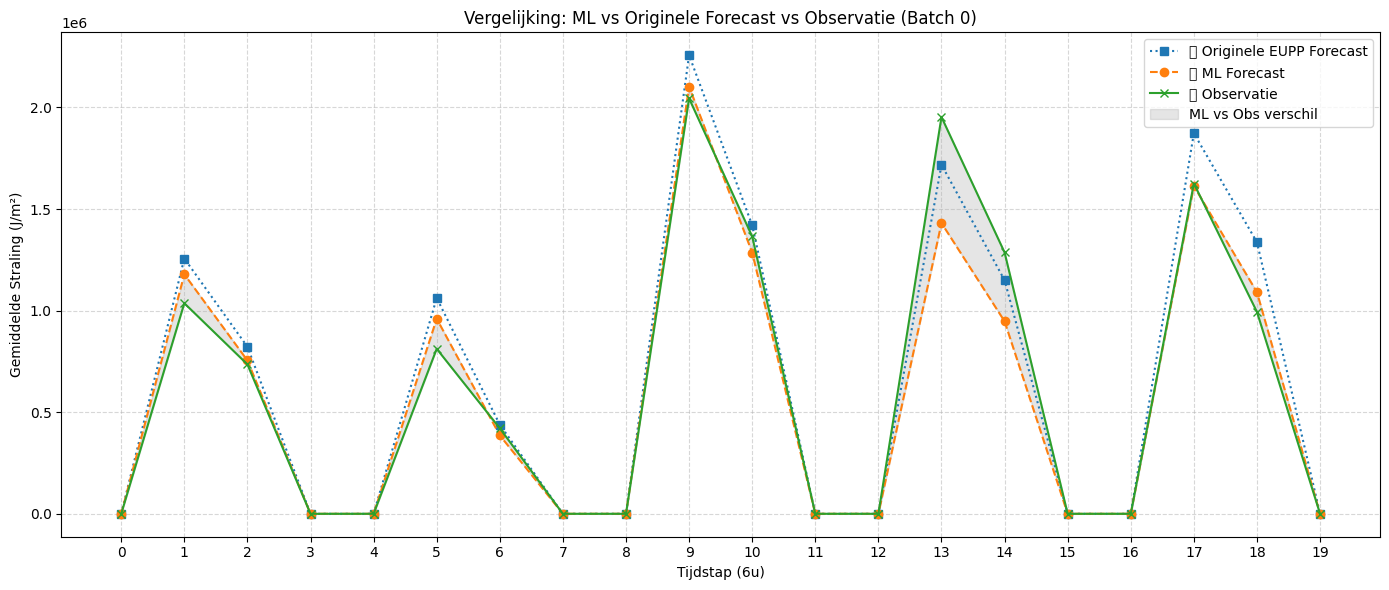

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 📂 Laad de .npy bestanden
raw_forecast = np.load("results/ForecastPlots/raw_forecast.npy")     # shape: (20,)
mu = np.load("results/ForecastPlots/mu.npy")                         # shape: (4, 20, 1056) of (1, 20)
targets = np.load("results/ForecastPlots/targets.npy")               # shape: (4, 20, 1056) of (1, 20)

# 🔎 Debug print (optioneel)
print("raw_forecast shape:", raw_forecast.shape)
print("mu shape:", mu.shape)
print("targets shape:", targets.shape)

# ✅ Als shape (batch, tijd, grid): neem eerste batch en gemiddelde over grid
# ✅ Altijd batch 0 gebruiken
mu_mean = mu[0]         # (20,)
targets_mean = targets[0]  # (20,)


timesteps = np.arange(20)

# 📈 Plot
plt.figure(figsize=(14, 6))
plt.plot(timesteps, raw_forecast, label="📊 Originele EUPP Forecast", linestyle=':', marker='s')
plt.plot(timesteps, mu_mean, label="📡 ML Forecast", linestyle='--', marker='o')
plt.plot(timesteps, targets_mean, label="🌍 Observatie", linestyle='-', marker='x')

plt.fill_between(timesteps, mu_mean, targets_mean, color='gray', alpha=0.2, label="ML vs Obs verschil")

plt.title("Vergelijking: ML vs Originele Forecast vs Observatie (Batch 0)")
plt.xlabel("Tijdstap (6u)")
plt.ylabel("Gemiddelde Straling (J/m²)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(timesteps)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
raw_forecast

In [ ]:
targets

In [ ]:
mu